In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [50]:
main_df = pd.DataFrame()

dataset = "COVID-19-geographic-disbtribution-worldwide-2020-12-14.csv"

df = pd.read_csv(dataset, error_bad_lines=False)

# df.set_index("dateRep", inplace=True)
df = df[["dateRep", "cases", "deaths", "countriesAndTerritories", "continentExp"]]

# converting the date to pandas date format
df["dateRep"]= pd.to_datetime(df["dateRep"])

df_uk = df[df['countriesAndTerritories'] == 'United_Kingdom']
print(df_uk.head(10))

# print(df.head(20))

# # now we merge the dataframes
# if len(main_df) == 0:
#     main_df = df
# else:
#     main_df = main_df.join(df)  # joining here

         dateRep  cases  deaths countriesAndTerritories continentExp
58378 2020-12-14  18447     144          United_Kingdom       Europe
58379 2020-12-13  21501     520          United_Kingdom       Europe
58380 2020-12-12  21672     424          United_Kingdom       Europe
58381 2020-12-11  20964     516          United_Kingdom       Europe
58382 2020-12-10  16578     533          United_Kingdom       Europe
58383 2020-12-09  12281     599          United_Kingdom       Europe
58384 2020-12-08  14718     189          United_Kingdom       Europe
58385 2020-12-07  17271     231          United_Kingdom       Europe
58386 2020-12-06  15539     397          United_Kingdom       Europe
58387 2020-12-05  16298     504          United_Kingdom       Europe


In [51]:
# x = df_uk['dateRep']
# y= df_uk['deaths']
# plt.xlabel('Date')
# plt.ylabel('Deaths')
# plt.plot(x,y, linewidth=0.8)

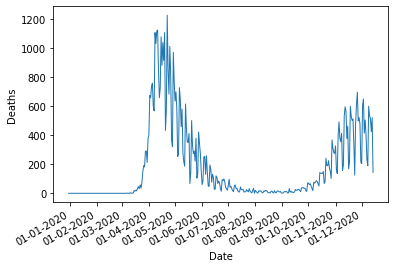

In [52]:
fig, ax = plt.subplots()
ax.plot('dateRep', 'deaths', data=df_uk, linewidth=1)
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.xlabel('Date')
plt.ylabel('Deaths')

plt.show()

In [53]:
print(df_uk.head())

         dateRep  cases  deaths countriesAndTerritories continentExp
58378 2020-12-14  18447     144          United_Kingdom       Europe
58379 2020-12-13  21501     520          United_Kingdom       Europe
58380 2020-12-12  21672     424          United_Kingdom       Europe
58381 2020-12-11  20964     516          United_Kingdom       Europe
58382 2020-12-10  16578     533          United_Kingdom       Europe


### Preprocessing

In [54]:
df_uk.isnull().sum()

dateRep                    0
cases                      0
deaths                     0
countriesAndTerritories    0
continentExp               0
dtype: int64

### Exploratory Data Analysis

e:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cases', ylabel='Density'>

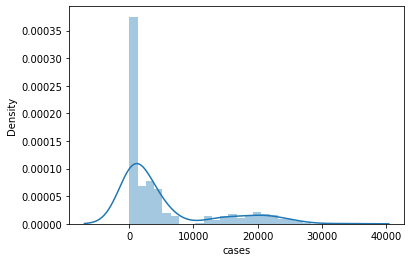

In [55]:
sns.distplot(df_uk['cases'])

e:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deaths', ylabel='Density'>

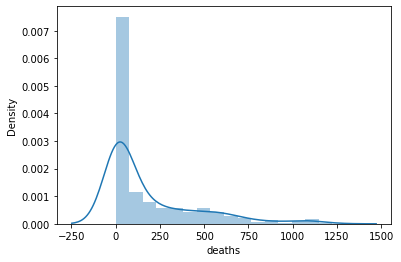

In [56]:
sns.distplot(df_uk['deaths'])

### Log Transformation

In [57]:
# df_uk['deathsLog'] = np.log(df_uk['deaths'])

In [58]:
# df_uk['casesLog'] = np.log(df_uk['cases'])
# df_uk[df_uk.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df_uk.isnull().sum()

dateRep                    0
cases                      0
deaths                     0
countriesAndTerritories    0
continentExp               0
dtype: int64

In [59]:
df_uk.head()

,dateRep,cases,deaths,countriesAndTerritories,continentExp
58378,2020-12-14,18447,144,United_Kingdom,Europe
58379,2020-12-13,21501,520,United_Kingdom,Europe
58380,2020-12-12,21672,424,United_Kingdom,Europe
58381,2020-12-11,20964,516,United_Kingdom,Europe
58382,2020-12-10,16578,533,United_Kingdom,Europe


In [60]:
# This does not work?
# sns.distplot(df_uk['casesLog'])

### Correlation Matrix


In [61]:
corr=df_uk.corr()

<AxesSubplot:>

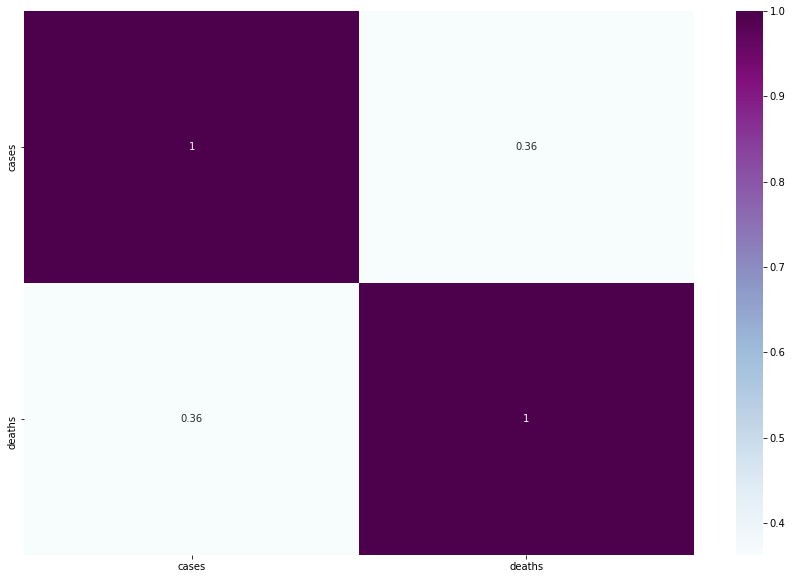

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

### KMeans Clustering

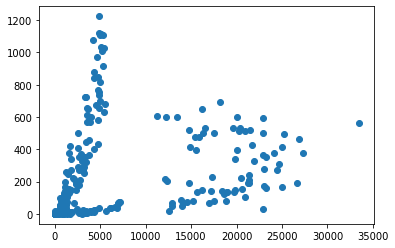

In [63]:
X = df_uk['cases']
y = df_uk['deaths']
plt.scatter(X, y)

In [64]:
X = X.values.reshape(-1, 1) # reshaping X

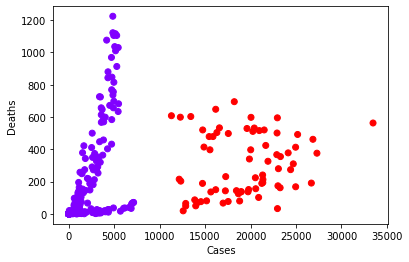

In [65]:
from sklearn.cluster import KMeans
est = KMeans(2)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

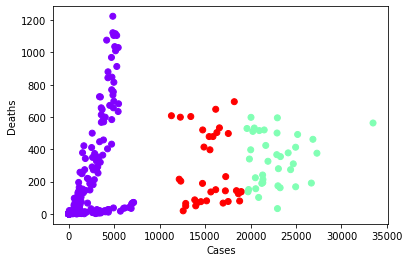

In [66]:
from sklearn.cluster import KMeans
est = KMeans(3)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')

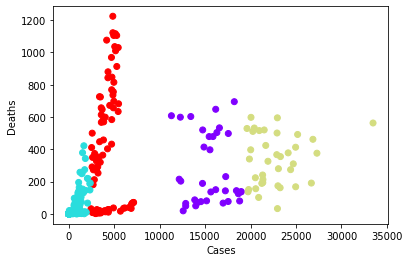

In [67]:
from sklearn.cluster import KMeans
est = KMeans(4)  # a cluster for lockdown and not lockdown\
est.fit(X)
y_kmeans = est.predict(X)

plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.scatter(X, y, c=y_kmeans, cmap='rainbow')